In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
import pandas as pd

# Experiment 1

In [7]:
K = 273.15
hotMass = np.array([207, 146, 217, 211]) #grams
hotTemp = np.array([47.5, 47.2,47.6, 47.4]) + K #kelvin
coldMass = np.array([129, 209, 172, 193])
coldTemp = np.array([17.5, 17.4, 17.4, 17.4]) + K
eqTemp = np.array([35.7, 29.7, 34.2, 33.0]) + K

In [11]:
predicted = (hotMass*hotTemp + coldMass*coldTemp) / (coldMass+hotMass)
percErr = np.abs((eqTemp - predicted) / eqTemp)
for i in range(len(percErr)):
    print('Trial {}'.format(i+1))
    print('Percent Error: {:.2f} %'.format(percErr[i]*100))

Trial 1
Percent Error: 0.09 %
Trial 2
Percent Error: 0.01 %
Trial 3
Percent Error: 0.02 %
Trial 4
Percent Error: 0.02 %


first trial we measured hot then cold, for subsequent trials we switched the order as we expected the colder cup to not vary as much 

# Experiment 2

In [4]:
K = 273.15
cw = 4.184
LF = 334
hotMass = np.array([202, 284, 267]) #grams
hotTemp = np.array([46.1, 48.9, 48.8]) + K #kelvin
coldMass = np.array([19,39, 77])
coldTemp = np.array([2.6, 2.2, 0.3]) + K
eqTemp = np.array([39.5, 38.1, 24.5]) + K

In [20]:
lf = cw*(-eqTemp + coldTemp + (hotMass*(-eqTemp + hotTemp)/coldMass))
print('Predicted Latent Heat of Fusion: {:.4f} kJ/kg'.format(lf.mean()))
print('Given Latent Heat of Fusion: {} kJ/kg'.format(LF))
print('Percent Error: {:.2f} %'.format(np.abs((lf.mean()-LF)/LF)*100))

Predicted Latent Heat of Fusion: 189.7801 kJ/kg
Given Latent Heat of Fusion: 334 kJ/kg
Percent Error: 43.18 %


This is failing, revising our process for experiment 2, now we measure the mass of the ice, measure the mass of the room temp water, then mix the two and take the temperature 

In [7]:
hotMass = np.array([227, 240, 222]) #grams
hotTemp = np.array([48.9, 48.8, 48.5]) + K #kelvin
iceMass = np.array([76, 104, 78])
iceTemp = np.array([0.2, 0.2, 0.5]) + K
waterMass = np.array([10, 11, 7])
waterTemp = np.array([29.1, 27.2, 24.7]) + K
eqTemp = np.array([18.7, 13.0, 17.5]) + K

In [11]:
lf = cw*(waterMass*(-eqTemp + waterTemp) + iceMass*(-eqTemp + iceTemp) + hotMass*(-eqTemp + hotTemp))/iceMass
print('Predicted Latent Heat of Fusion: {:.4f} kJ/kg'.format(lf.mean()))
print('Given Latent Heat of Fusion: {} kJ/kg'.format(LF))
print('Percent Error: {:.2f} %'.format(np.abs((lf.mean()-LF)/LF)*100))

Predicted Latent Heat of Fusion: 301.6180 kJ/kg
Given Latent Heat of Fusion: 334 kJ/kg
Percent Error: 9.70 %


In [15]:
#Error propagating
mr = (cw*(waterTemp - eqTemp) / iceMass * 1)**2 #mass room
tr = (cw*waterMass/iceMass * 0.1)**2 #temp room

mi = (cw*(iceTemp - eqTemp) / iceMass * 1)**2 #mass ice
ti = (cw*iceMass/iceMass * 0.1)**2 #temp ice

mh = (cw*(hotTemp - eqTemp) / iceMass * 1)**2 #mass hot
th = (cw*hotMass/iceMass * 0.1)**2 #temp hot

te = (cw*(waterMass + iceMass + hotMass)/iceMass * 0.1)**2 #eqTemp

err = np.sqrt(mr + tr + mi + ti + mh + th + te)
print('Error Propagation: {}'.format(err))
stdErr = lf.std()/np.sqrt(lf.shape)
print('Standard Error: {}'.format(stdErr))
totErr = np.sqrt(err**2 + stdErr**2)
print('Total Errors: {}'.format(totErr))
print('Total Error: {:.1f}'.format(totErr.mean()))

Error Propagation: [2.97293896 2.41141096 2.83765589]
Standard Error: [1.76683518]
Total Errors: [3.45833379 2.98941623 3.34275298]
Total Error: 3.3


In [10]:
predEq = (waterMass*waterTemp + hotMass*hotTemp + iceMass*iceTemp - iceMass/1000*LF) / (waterMass + hotMass + iceMass)
predEq - K

array([36.36139297, 33.79510986, 35.67702932])

# Experiment 3

In [2]:
#Cup
K = 273.15
cw = 4.184
cupThickness = 0.2 #cm 
baseDiameter = 5.9
topDiameter = 8.3 
height = 12.5
waterDepthS = 3.6 #cm
waterMassS = 107 #g
initWater = 18.7 
initBath = 48.2

#Can
# canDiameter = 7.1 #cm
# canThickness = 0.2
# waterDepthC = 5.4
# initBath = 48.2 + K
# initCan = 14.1 + K
# canMass = 46
# canWaterMass = 171

In [3]:
delta = (topDiameter - baseDiameter)/2
b = baseDiameter/2
SA = np.pi*(b**2*waterDepthS + b*delta/height*waterDepthS**2 + delta**2/3/height**2*waterDepthS**3) + np.pi*b**2
saErr = 5 #temp for now cause i don't want to error propagate this
SA # cm^2

137.74344164316668

In [4]:
waterMass = 52
waterT = 2.8 +K
waterD = 1.83

In [5]:
data = pd.read_csv('styrofoam1.csv', delimiter=',')
data

,Latest: Time (s),Latest: Temperature (°C)
0,0.0,18.271113
1,0.5,18.269625
2,1.0,18.271113
3,1.5,18.274090
4,2.0,18.285995
...,...,...
631,315.5,21.394724
632,316.0,21.409347
633,316.5,21.422507
634,317.0,21.434204


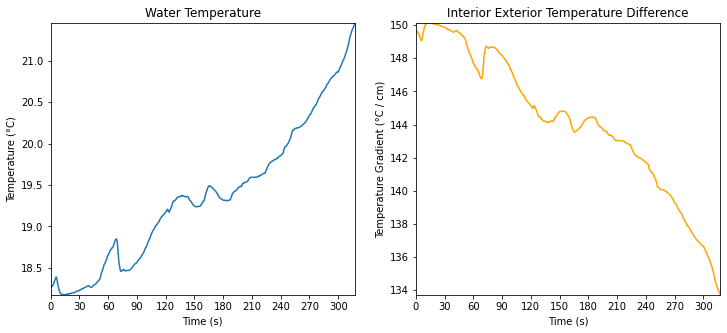

In [6]:
dT = initBath - data['Latest: Temperature (°C)']  
dT

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(data['Latest: Time (s)'], data['Latest: Temperature (°C)'])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Temperature (°C)')
ax[0].set_title('Water Temperature')
ax[0].set_xticks(np.arange(0, max(data['Latest: Time (s)']), 30))
ax[0].set_xlim(min(data['Latest: Time (s)']), max(data['Latest: Time (s)']));
ax[0].set_ylim(min(data['Latest: Temperature (°C)']), max(data['Latest: Temperature (°C)']));

ax[1].plot(data['Latest: Time (s)'], dT/cupThickness, color='orange')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Temperature Gradient (°C / cm)')
ax[1].set_title('Interior Exterior Temperature Difference')
ax[1].set_xticks(np.arange(0, max(data['Latest: Time (s)']), 30))
ax[1].set_xlim(min(data['Latest: Time (s)']), max(data['Latest: Time (s)']));
ax[1].set_ylim(min(dT/cupThickness), max(dT/cupThickness));

#plt.savefig('Experiment 3 Initial Data.png', facecolor='w', format='png', bbox_inches='tight');

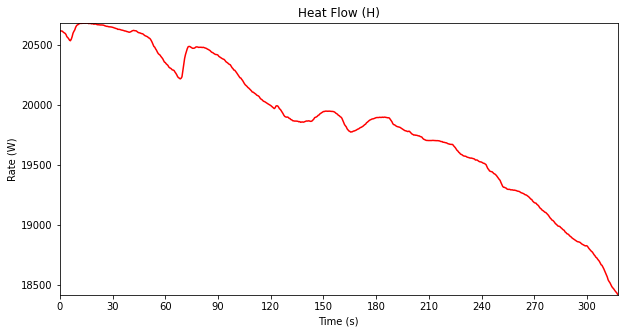

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

H = dT*SA/cupThickness
ax.plot(data['Latest: Time (s)'], H, color='red')

ax.set_xticks(np.arange(0, max(data['Latest: Time (s)']), 30))
ax.set_xlim(min(data['Latest: Time (s)']), max(data['Latest: Time (s)']));
ax.set_ylim(min(H),max(H))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Rate (W)')
ax.set_title('Heat Flow (H)');
#plt.savefig('Experiment 3 Heatflow.png', facecolor='w', format='png',bbox_inches='tight')

In [8]:
area = np.trapz(H, x=data['Latest: Time (s)'], dx = 0.1)
print('{:e}'.format(area))

6.305359e+06


1.593170e+06


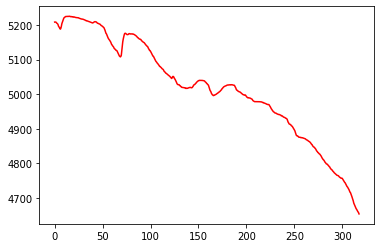

In [19]:
sig = dT - (dT + 0.1*np.sqrt(2))
tSig = (sig*SA/cupThickness)**2
sSig = (dT*saErr/cupThickness)**2
cSig = (dT*SA/(cupThickness**2)*0.05)**2
hSig = np.sqrt(tSig + sSig + cSig)

plt.plot(data['Latest: Time (s)'], np.abs(hSig), color='red')
arSig = np.trapz(np.abs(hSig), x=data['Latest: Time (s)'], dx = 0.1)
print('{:e}'.format(arSig))

In [22]:
Q = cw*waterMassS*(max(data['Latest: Temperature (°C)']) - min(data['Latest: Temperature (°C)']) )
k = Q/area 
gk = 0.033/100
kSig = Q/area**2*arSig
print('Total Heat Flow: {:e}'.format(Q))
print('Exp. Conductivity: {:e} +/- {:e}'.format(k,kSig))
print('Given Conductivity: {:e}'.format(gk))
print('Percent Error: {:.2f} %'.format(np.abs(k-gk)/gk*100))

Total Heat Flow: 1.468566e+03
Exp. Conductivity: 2.329076e-04 +/- 5.884859e-05
Given Conductivity: 3.300000e-04
Percent Error: 29.42 %


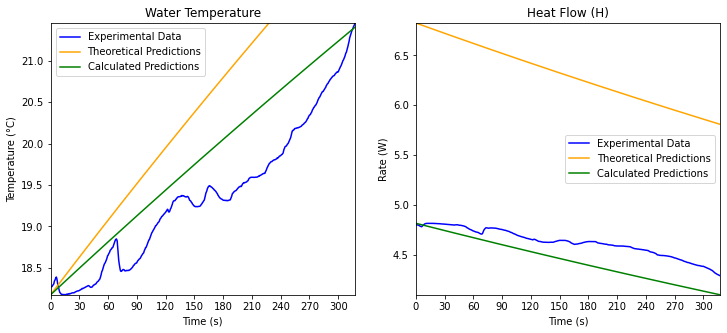

In [10]:
dt = 0.001 #s
Time = np.arange(0, max(data['Latest: Time (s)']), dt)


def heatFlow(tempIn, cond):
    global initBath, SA, cupThickness, dt
    
    Q = cond*SA*(initBath-tempIn)/cupThickness * dt
    
    return Q

def tempChange(initTemp, mass, conduct):
    global cw
    q = heatFlow(initTemp, conduct)
    deltaTemp = q/mass/cw
    return deltaTemp

Temperature = [min(data['Latest: Temperature (°C)']) ]
cTemp = [min(data['Latest: Temperature (°C)']) ]
for i in range(1,Time.shape[0]):
    Temperature.append(Temperature[-1] + tempChange(Temperature[-1], waterMassS, gk))
    cTemp.append(cTemp[-1] + tempChange(cTemp[-1], waterMassS, k))
Temperature = np.array(Temperature)
cTemp = np.array(cTemp)
theoH = (initBath-Temperature)*SA/cupThickness * gk
calcH = (initBath-Temperature)*SA/cupThickness * k
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(data['Latest: Time (s)'], data['Latest: Temperature (°C)'],color='blue', label='Experimental Data')
ax[0].plot(Time, Temperature, color='orange', label='Theoretical Predictions')
ax[0].plot(Time, cTemp, color='green', label='Calculated Predictions')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Temperature (°C)')
ax[0].set_title('Water Temperature')
ax[0].set_xticks(np.arange(0, max(data['Latest: Time (s)']), 30))
ax[0].set_xlim(min(data['Latest: Time (s)']), max(data['Latest: Time (s)']));
ax[0].set_ylim(min(data['Latest: Temperature (°C)']), max(data['Latest: Temperature (°C)']));
ax[0].legend()

ax[1].plot(data['Latest: Time (s)'], H*k, color='blue', label='Experimental Data')
ax[1].plot(Time,theoH, color='orange', label='Theoretical Predictions')
ax[1].plot(Time, calcH, color='green', label='Calculated Predictions')
ax[1].set_xticks(np.arange(0, max(data['Latest: Time (s)']), 30))
ax[1].set_xlim(min(data['Latest: Time (s)']), max(data['Latest: Time (s)']));
ax[1].set_ylim(min(calcH), max(theoH))
ax[1].legend()
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Rate (W)')
ax[1].set_title('Heat Flow (H)');
#plt.savefig('Experiment 3 Theory Comp.png', facecolor='w', format='png', bbox_inches='tight')

In [163]:
#Can
canDiameter = 7.1 #cm
canThickness = 0.2
waterDepthC = 5.4
initBath = 48.2 
initCan = 14.1 
canMass = 46
canWaterMass = 171

SA = np.pi*(canDiameter*waterDepthC + (canDiameter/2)**2)

data = pd.read_csv('can1.csv', delimiter=',')

dT = initBath - data['Latest: Temperature (°C)']  
H = dT*SA/canThickness
area = np.trapz(H, x=data['Latest: Time (s)'], dx = 0.1)
Q = cw*canWaterMass*(max(data['Latest: Temperature (°C)']) - min(data['Latest: Temperature (°C)']) )
k = Q/area

print('Area: {:e}'.format(area))
print('Total Heat Flow: {:e}'.format(Q))
print('Exp. Conductivity: {:e}'.format(k))

Area: 3.208085e+06
Total Heat Flow: 2.017222e+04
Exp. Conductivity: 6.287932e-03


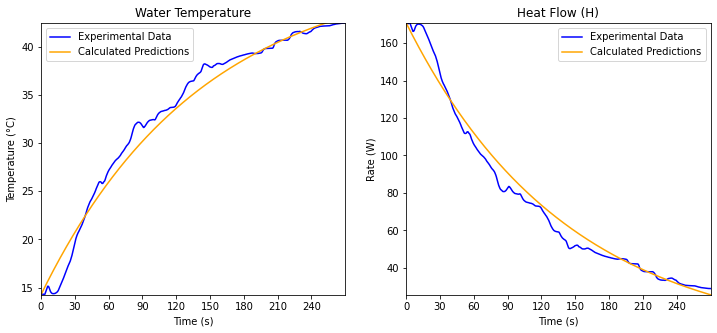

In [164]:
dt = 0.001 #s
Time = np.arange(0, max(data['Latest: Time (s)']), dt)


def heatFlow(tempIn):
    global initBath, SA, k, canThickness, dt
    
    Q = k*SA*(initBath-tempIn)/cupThickness * dt
    
    return Q

def tempChange(initTemp, mass):
    global cw
    q = heatFlow(initTemp)
    deltaTemp = q/mass/cw
    return deltaTemp

Temperature = [min(data['Latest: Temperature (°C)']) ]

for i in range(1,Time.shape[0]):
    Temperature.append(Temperature[-1] + tempChange(Temperature[-1], canWaterMass))
Temperature = np.array(Temperature)
theoH = (initBath-Temperature)*SA/cupThickness * k
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(data['Latest: Time (s)'], data['Latest: Temperature (°C)'],color='blue', label='Experimental Data')
ax[0].plot(Time, Temperature, color='orange', label='Calculated Predictions')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Temperature (°C)')
ax[0].set_title('Water Temperature')
ax[0].set_xticks(np.arange(0, max(data['Latest: Time (s)']), 30))
ax[0].set_xlim(min(data['Latest: Time (s)']), max(data['Latest: Time (s)']));
ax[0].set_ylim(min(data['Latest: Temperature (°C)']), max(data['Latest: Temperature (°C)']));
ax[0].legend()

ax[1].plot(data['Latest: Time (s)'], H*k, color='blue', label='Experimental Data')
ax[1].plot(Time,theoH, color='orange', label='Calculated Predictions')
ax[1].set_xticks(np.arange(0, max(data['Latest: Time (s)']), 30))
ax[1].set_xlim(min(data['Latest: Time (s)']), max(data['Latest: Time (s)']));
ax[1].set_ylim(min(theoH), max(theoH))
ax[1].legend()
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Rate (W)')
ax[1].set_title('Heat Flow (H)');
plt.savefig('Experiment 3 Can Comp.png', facecolor='w', format='png', bbox_inches='tight')

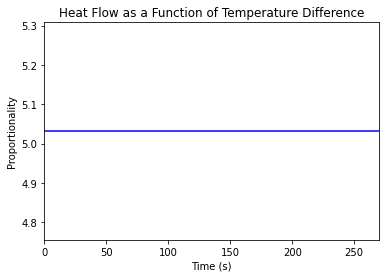

In [165]:
plt.plot(data['Latest: Time (s)'], H*k/(initBath - data['Latest: Temperature (°C)']),color='blue')
plt.xlim(min(data['Latest: Time (s)']), max(data['Latest: Time (s)']));
plt.title('Heat Flow as a Function of Temperature Difference')
plt.xlabel('Time (s)')
plt.ylabel('Proportionality')
plt.savefig('Proportionality.png',facecolor='w', format='png', bbox_inches='tight')

# Experiment 4

In [3]:
K = 273.15
canHeight = 7.1 #cm

Brass

In [ ]:
brassDepth = 4.0 #cm
initIceSlurry = 0.7 + K #kelvin
initBrass = 27.1

Copper

In [ ]:
copperDepth = 3.5 #cm
initIceSlurry = 0.3 + K
initCopper = 24.0 + K
probeDepth = 3.4 #cm
copperLength = 20.5 #cm

In [ ]:
initAlum = 25.5 + K
aluminumDepth = 4.5 #cm
initIceSlurry = 0.6 + K
probeDepth = 3.4
alumLength = 20.5